In [24]:
from ont_fast5_api.fast5_interface import get_fast5_file
from rnamodif.data_utils.datamap import experiment_files
from matplotlib import pyplot as plt
import numpy as np

# with get_fast5_file(fast5, mode='r') as f5:
                    # for i, read in enumerate(f5.get_reads()):

def process_read(read, window, normalization=None, trim_primer=None):
    print('new process')
    s = read.get_raw_data(scale=True)
    med = np.median(s)
    mad = 1.4826 * np.median(np.absolute(s-med))
    s = (s - med) / mad
    
    skip = 0
    if(not window):
        return s[skip:]
    
    last_start_index = len(s)-window
    if(last_start_index < skip):
        # if sequence is not long enough, last #window signals is taken, ignoring the skip index
        skip = last_start_index

    #Using torch rand becasue of multiple workers
    pos = torch.randint(skip, last_start_index+1, (1,))
    
    if(len(s) < window):
        return []
        
    #TODO remove reshape
    return s[pos:pos+window].reshape((window, 1))


def process_signal_mapping(self, mapping):
    #Taken from RODAN code, replace with native mapping function
    
    #this is skipped in basecalling code
    signal = (mapping.Dacs + mapping.offset) * mapping.range / mapping.digitisation
    
    med = np.median(signal)
    mad = mapping.offset * np.median(abs(signal-med))
    
    # factor=1.4826 # offset hardcoded in rodan basecalling code (check train data generation code)  
    # signal = (signal[signal_start:signal_end] - med) / mad
    
    signal = (signal - mapping.shift_frompA) / mapping.scale_frompA
    return signal

# train data gen rodan
# s_offset = pos.attrs["offset"]
# s_range = pos.attrs["range"]
# s_dig = pos.attrs["digitisation"]
# signal = (pos["Dacs"][:] + s_offset) * s_range / s_dig
# if len(signal) > args.maxsignallen: continue
# if args.debug: print("Read:", read, len(signal))
# shift = pos.attrs["shift_frompA"] # median
# scale = pos.attrs["scale_frompA"] # mad
# med = np.median(signal)
# mad = offset * np.median(abs(signal-med))
# signal = (signal - shift) / scale


#TODO has to support window = None -> return full read


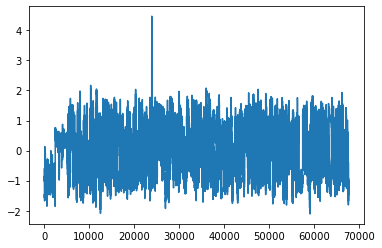

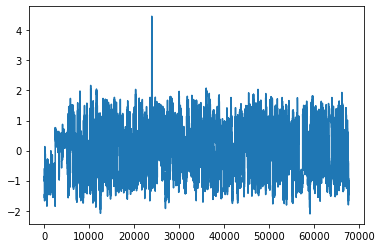

In [29]:
fast5 = experiment_files['5eu_2022_nia'][55]
with get_fast5_file(fast5, mode='r') as f5:
    for i, read in enumerate(f5.get_reads()):
        
        #basecalling norm
        s = read.get_raw_data(scale=True)
        med = np.median(s)
        mad = 1.4826 * np.median(np.absolute(s-med))
        s = (s - med) / mad
        plt.plot(s)
        plt.show()
        
        # print(i)
        # print(read.get_tracking_id())
        # print(read.get_channel_info())
        # print(read.get_context_tags())
        
        #training data prep norm
#         ci = read.get_channel_info()
#         s = read.get_raw_data(scale=True)
#         s = (s+ci['offset']) * ci['range']/ci['digitisation']
#         med = np.median(s)
#         mad = 1.4826 * np.median(abs(s-med))
#         # mad = np.median(np.absolute(x - med)) * factor
        
#         s = (s-med)/mad
#         plt.plot(s)
        
        break